In [28]:
# Test Teapot viewpoint
import mitsuba as mi
import matplotlib.pyplot as plt
import os
from mitsuba import ScalarTransform4f as T

mi.set_variant("scalar_rgb")


def load_sensor_prev(r, phi, theta, target):
    # Apply two rotations to convert from spherical coordinates to world 3D coordinates.
    origin = T.rotate([0, 0, 1], phi).rotate([0, 1, 0], theta) @ mi.ScalarPoint3f([0, 0, r])

    return mi.load_dict({
        'type': 'perspective',
        'fov': 25,
        # -1 0 0 0 0 1 0 1 0 0 -1 6.8 0 0 0 1
        'to_world': T.look_at(
            origin=origin,
            target=target,
            up=[0, 1, 0]
        ),
        'sampler': {
            'type': 'independent',
            'sample_count': 10
        },
        'film': {
            'type': 'hdrfilm',
            'width': 64,
            'height': 64,
            'rfilter': {
                'type': 'tent',
            },
            'pixel_format': 'rgb',
        },
    })


def load_sensor(fov, origin, target, up):

    return mi.load_dict({
        'type': 'perspective',
        'fov': fov,
        'to_world': T.look_at(
            origin=origin,
            target=target,
            up=up
        ),
        'sampler': {
            'type': 'independent',
            'sample_count': 64
        },
        'film': {
            'type': 'hdrfilm',
            'width': 1280,
            'height': 720,
            'rfilter': {
                'type': 'tent',
            },
            'pixel_format': 'rgb',
        },
    })

In [19]:
scene_file = 'scenes/teapot/scene.xml'
scene = mi.load_file(scene_file)

In [36]:
origin = (27.6002, 13.5815, 11.608)
target = (26.7384, 13.2371, 11.238)
up = (0, 1, 0)
fov = 24.1143
vpbrt_sensor = load_sensor(fov, origin, target, up)

In [33]:
initial_image = mi.render(scene)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


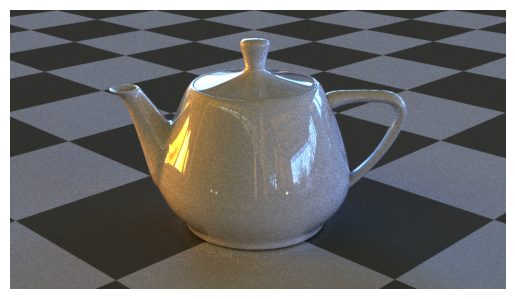

In [34]:
plt.imshow(initial_image)
plt.axis('off')
plt.grid(False);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


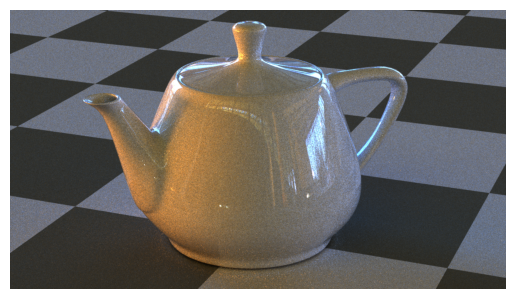

In [37]:
vpbrt_image = mi.render(scene, sensor=vpbrt_sensor)
plt.imshow(vpbrt_image)
plt.axis('off')
plt.grid(False);